# # Coffee Sales Analysis by Region
 This notebook analyzes coffee sales data by region, showing which coffee types are most popular in different areas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('index_1.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


Create a copy of the original data for analysis

In [3]:
coffee_data = df.copy()
# Extract region from card number (first 4 digits after ANON-)
coffee_data['region'] = coffee_data['card'].str.extract(r'ANON-(\d{4})')
# Filter out cash transactions (no card/region)
coffee_data = coffee_data.query("cash_type == 'card'").copy()

coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name,region
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,0000
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,0000
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,0000
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,0000
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,0000


## 2. Analyze Sales by Region and Coffee Type

In [4]:
region_sales = coffee_data.groupby(['region', 'coffee_name'])['money'].sum().unstack()
region_sales['Total'] = region_sales.sum(axis=1)

# Sort by total sales
region_sales = region_sales.sort_values('Total', ascending=False)

# Display the sales data
print("Region-wise Coffee Sales:")
region_sales

Region-wise Coffee Sales:


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,Total
region,,,,,,,,,
0000,14650.26,24751.12,17439.14,8521.16,7384.86,2690.28,9933.46,26875.3,112245.58


Now lets try to Group by region and coffee name to get sales

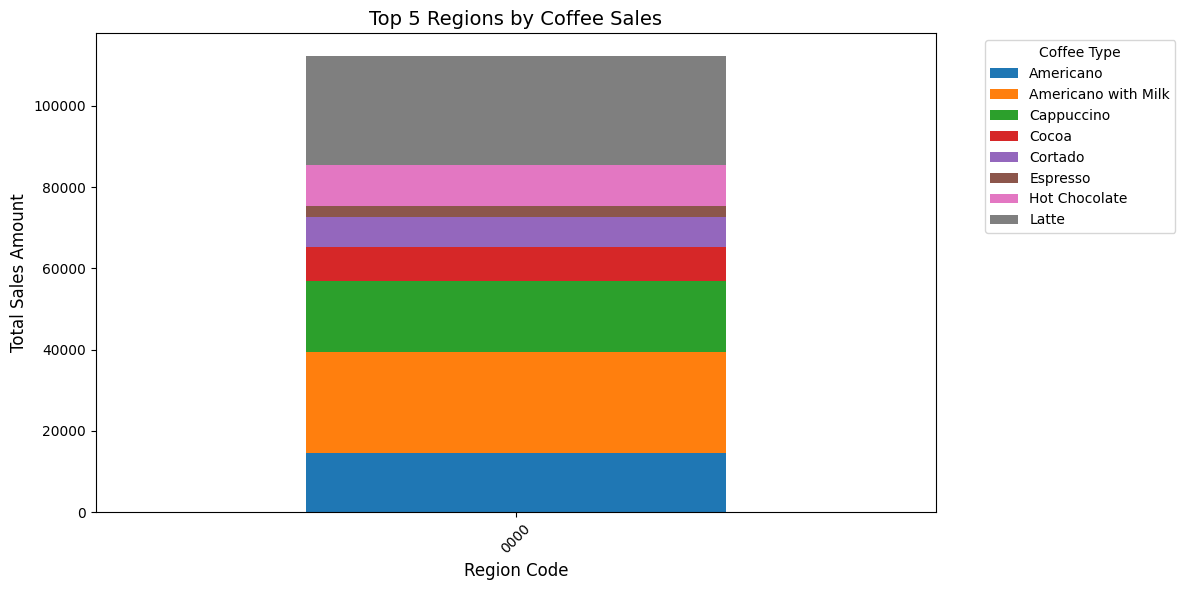

In [6]:
plt.figure(figsize=(12, 6))

 #Get top 5 regions and remove the 'Total' column for plotting
top_regions = region_sales.head(5).drop('Total', axis=1)

# Create stacked bar chart
top_regions.plot(kind='bar', stacked=True, ax=plt.gca())

# Customize the plot
plt.title('Top 5 Regions by Coffee Sales', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xlabel('Region Code', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

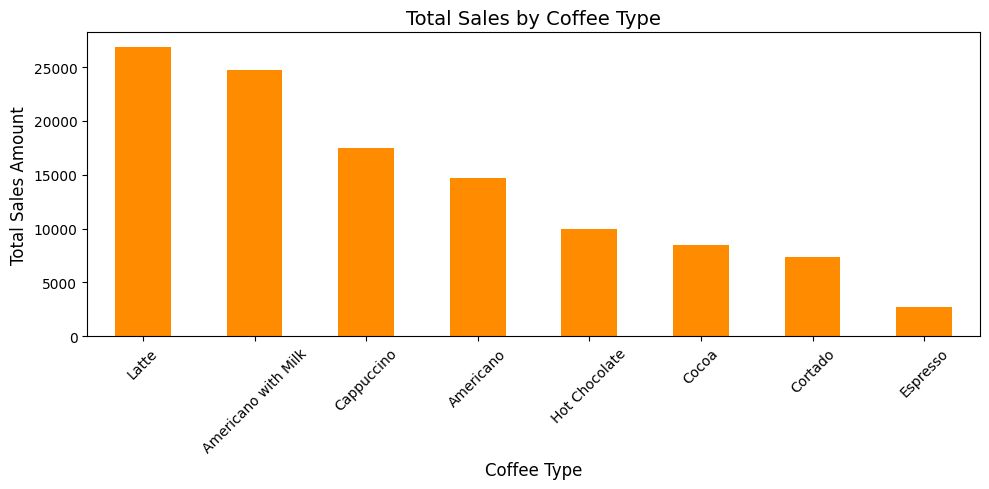

In [7]:
coffee_totals = coffee_data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 5))
coffee_totals.plot(kind='bar', color='darkorange')
plt.title('Total Sales by Coffee Type', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xlabel('Coffee Type', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This shows the popularity of different cofees

## Monthly Sales Trend


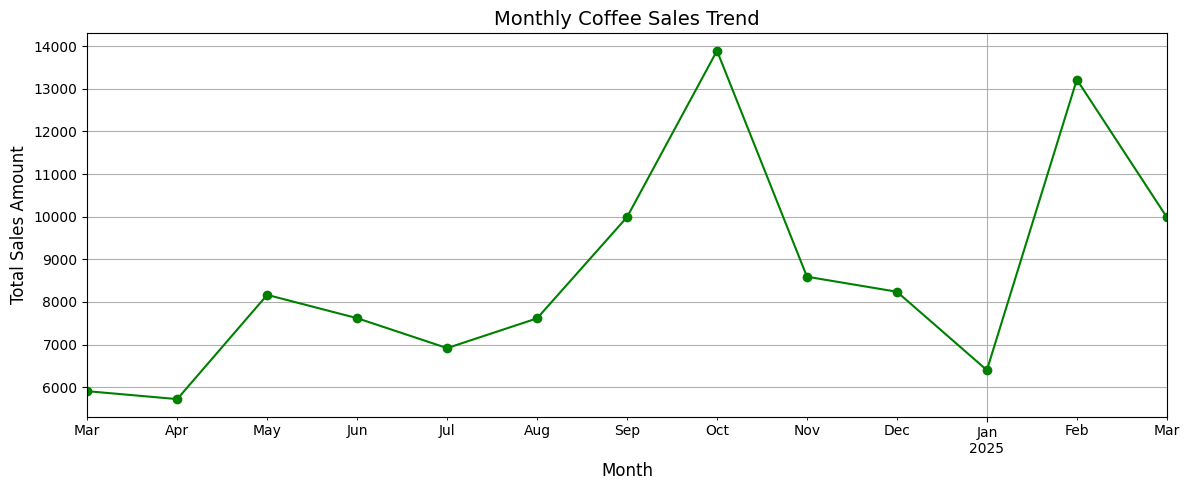

In [8]:
# Convert date to datetime and extract month
coffee_data['date'] = pd.to_datetime(coffee_data['date'])
coffee_data['month'] = coffee_data['date'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = coffee_data.groupby('month')['money'].sum()

# Plot the trend
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Coffee Sales Trend', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()